In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
real_estate_df = pd.read_csv("C:\\Users\\USER\\Downloads\\Real_Estate.csv")
real_estate_df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [3]:
real_estate_df.shape

(414, 7)

In [4]:
real_estate_df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [5]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [6]:
real_estate_df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [7]:
real_estate_df['Transaction date'].unique()  

array(['2012-09-02 16:42:30.519336', '2012-09-04 22:52:29.919544',
       '2012-09-05 01:10:52.349449', '2012-09-05 13:26:01.189083',
       '2012-09-06 08:29:47.910523', '2012-09-06 14:18:34.142030',
       '2012-09-06 15:07:23.396013', '2012-09-07 07:57:25.291322',
       '2012-09-07 10:06:48.384148', '2012-09-07 13:21:33.254701',
       '2012-09-07 20:42:58.363599', '2012-09-07 21:36:29.294109',
       '2012-09-08 01:05:20.095597', '2012-09-09 09:29:47.768544',
       '2012-09-09 17:24:50.129628', '2012-09-11 19:06:31.002528',
       '2012-09-12 05:03:03.332710', '2012-09-12 06:54:06.555817',
       '2012-09-12 23:27:33.301004', '2012-09-14 06:14:19.030272',
       '2012-09-16 01:53:06.000222', '2012-09-19 00:48:38.873410',
       '2012-09-19 08:08:21.403851', '2012-09-19 16:28:39.921640',
       '2012-09-20 04:20:08.912777', '2012-09-20 13:50:20.328592',
       '2012-09-21 07:30:38.941907', '2012-09-22 03:31:31.593518',
       '2012-09-22 13:31:16.610764', '2012-09-22 15:04:04.7743

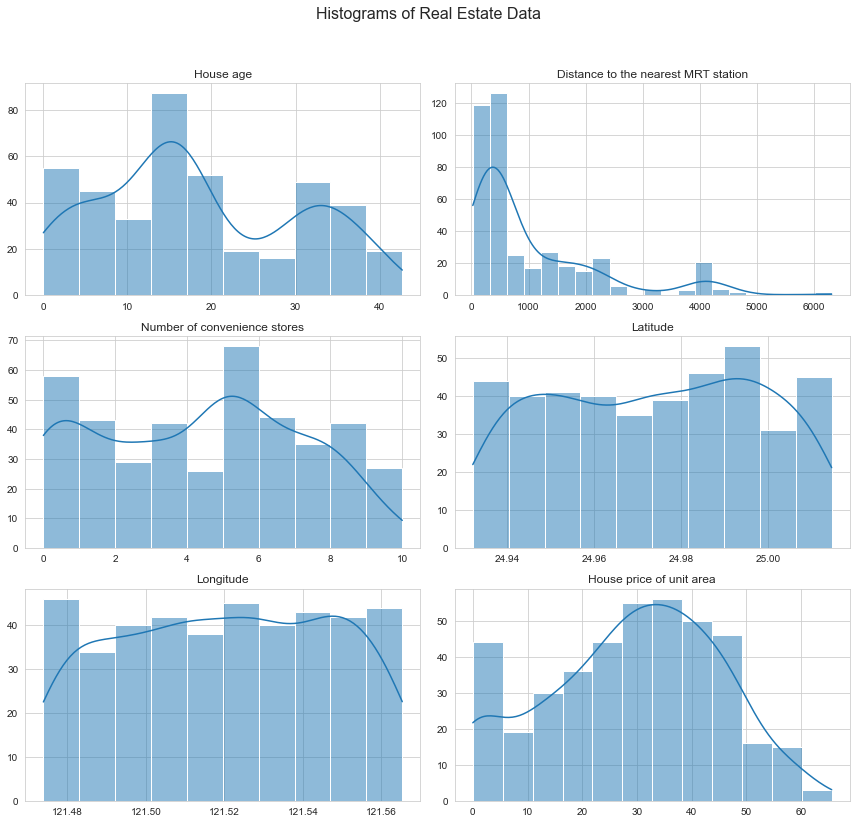

In [8]:
#set grid as a white 
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']
for i, col in enumerate(cols):
    sns.histplot(real_estate_df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')  # Removing x-axis label
    axes[i//2, i%2].set_ylabel('')  # Removing y-axis label

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
       


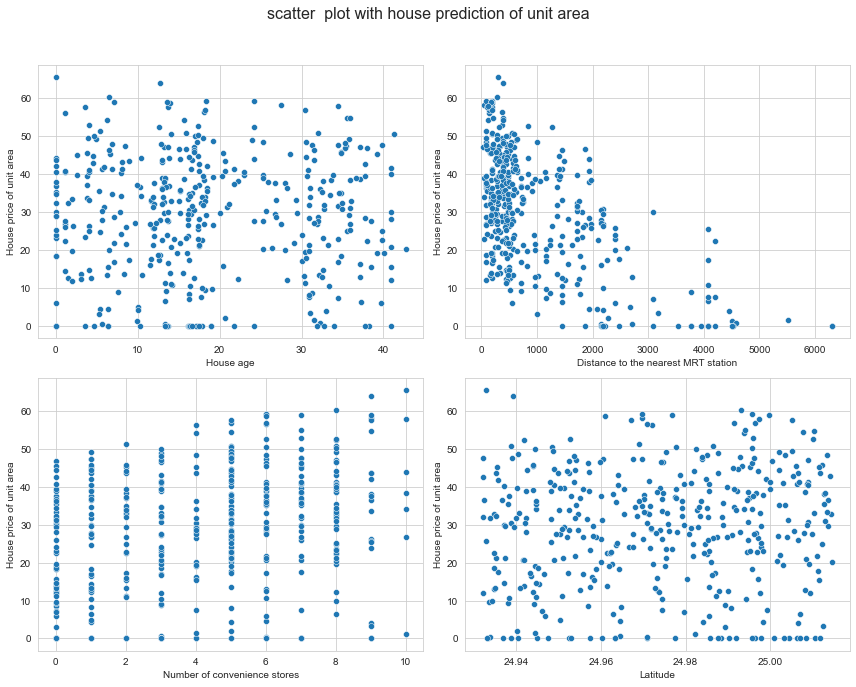

In [17]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10))
fig.suptitle('scatter  plot with house prediction of unit area' ,fontsize = 16)

#scatterplot for each variable against the house price
sns.scatterplot(data=real_estate_df,x ='House age',y = 'House price of unit area',ax=axes[0,0])
sns.scatterplot(data=real_estate_df,x ='Distance to the nearest MRT station',y = 'House price of unit area',ax = axes[0,1])
sns.scatterplot(data=real_estate_df,x = 'Number of convenience stores',y ='House price of unit area',ax = axes[1,0])
sns.scatterplot(data=real_estate_df,x = 'Latitude',y ='House price of unit area',ax=axes[1,1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
            


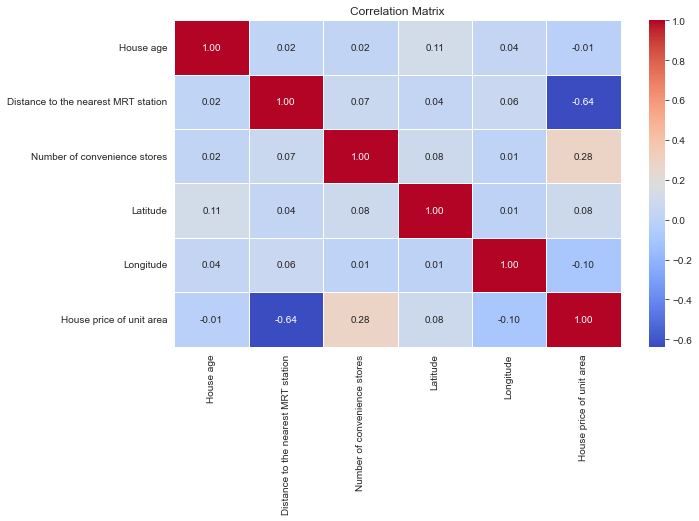

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [19]:
# Correlation matrix
correlation_matrix = real_estate_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)
 


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

x = real_estate_df[features]
y = real_estate_df[target]

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


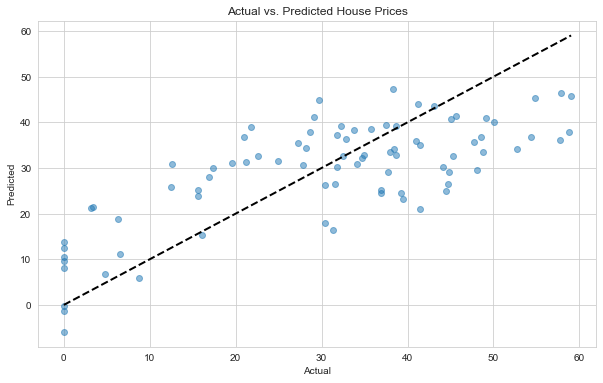

In [26]:
# Model initialization
model = LinearRegression()
#fit the model 
model.fit(x_train,y_train)
# Making predictions using the linear regression model
y_pred_lr = model.predict(x_test)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()